In [1]:
from evwTools import *

Welcome to JupyROOT 6.12/06


---

## Lets start with all energies E_{west} > 1700 MeV

---
### delta E/E vs. t_{west}

In [2]:
f = r.TFile("./data/DeltaE_over_energyWest_vs_timeWest_60hUnblinding.root")
f.ls()

TFile**		./data/DeltaE_over_energyWest_vs_timeWest_60hUnblinding.root	
 TFile*		./data/DeltaE_over_energyWest_vs_timeWest_60hUnblinding.root	
  KEY: TCanvas	c1;1	c1


In [3]:
c1 =f.Get("c1")
print([x for x in c1.GetListOfPrimitives()])

[<ROOT.TFrame object ("TFrame") at 0x7fffce1034a0>, <ROOT.TH2D object ("h") at 0x7fffce108870>, <ROOT.TPaveText object ("title") at 0x7fffce229f60>]


In [4]:
h = c1.GetPrimitive("h").Clone()

In [5]:
timeWidth = 100
timeBins = [x for x  in range(30,550, timeWidth)]
print(timeBins)

[30, 130, 230, 330, 430, 530]


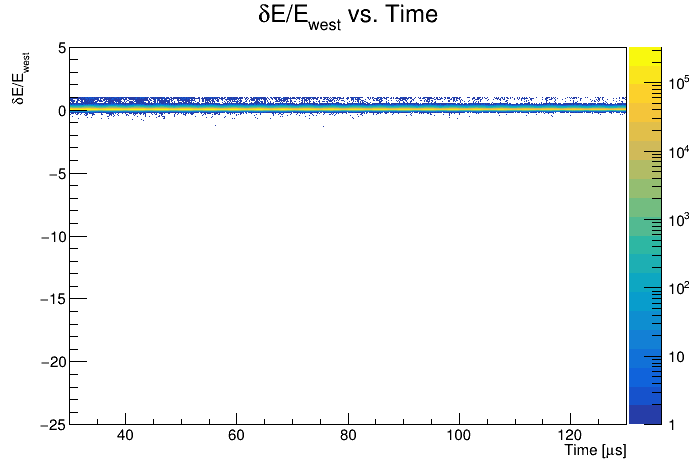

In [6]:
c = r.TCanvas()
h.Draw("colz")
h.GetXaxis().SetRangeUser(timeBins[0],timeBins[0]+timeWidth)
c.SetLogz()
#c.SetGrid()
c.Draw()

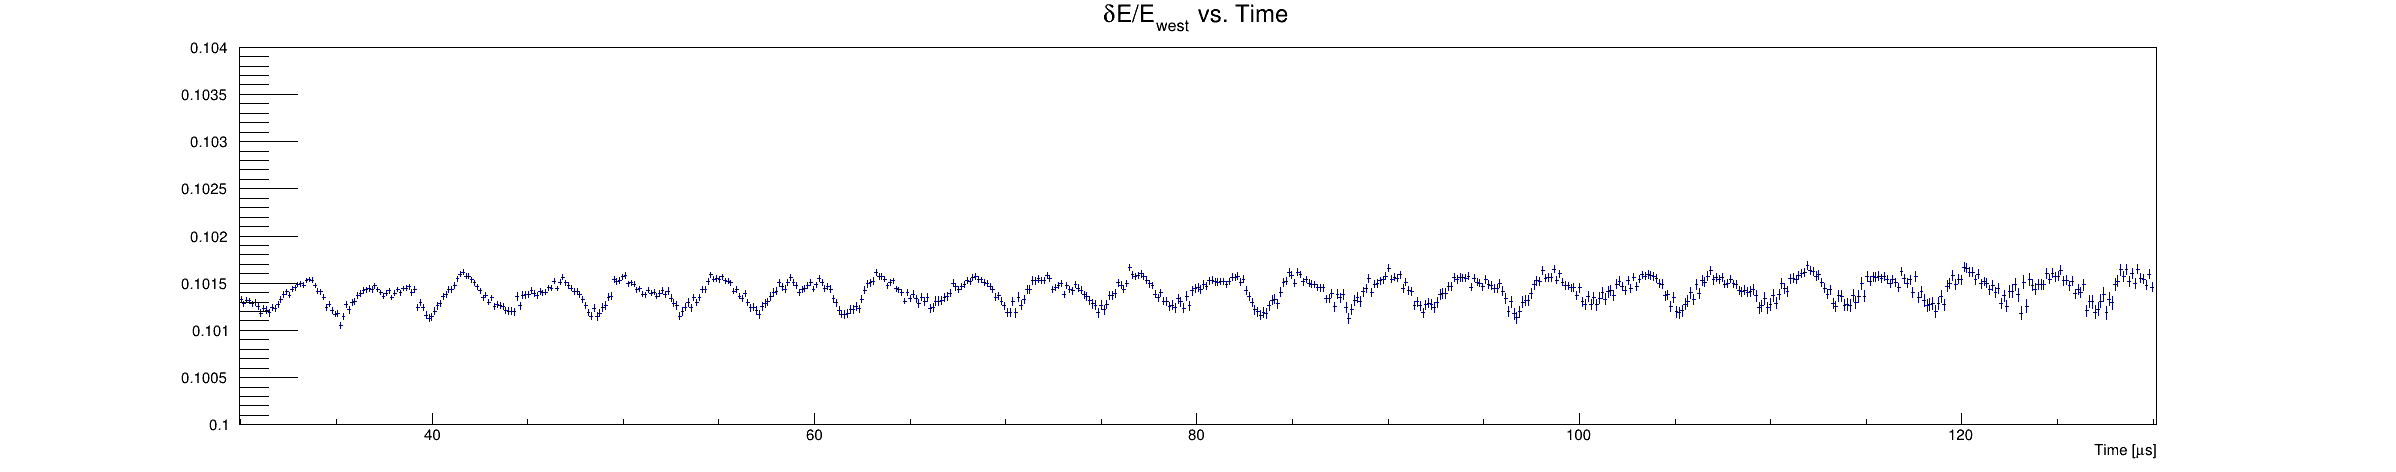

In [7]:
c = r.TCanvas("c","c",2400,500)
h2 = h.ProfileX().Clone("h2")
h2.GetXaxis().SetRangeUser(30,650)
h2.GetYaxis().SetRangeUser(0.1,0.104)
h2.Draw("")
#h2.Fit("pol1")
c.SetLogz()
#c.SetGrid()
c.Draw()

---

### Lets get the FFT of this plot

672 100.08510638297871 29.86170212765957 129.94680851063828
0.14893617021276592 0.009991496598639456
[ 0.          0.0099915   0.01998299  0.02997449  0.03996599  0.04995748
  0.05994898  0.06994048  0.07993197  0.08992347  0.09991497  0.10990646
  0.11989796  0.12988946  0.13988095  0.14987245  0.15986395  0.16985544
  0.17984694  0.18983844  0.19982993  0.20982143  0.21981293  0.22980442
  0.23979592  0.24978741  0.25977891  0.26977041  0.2797619   0.2897534
  0.2997449   0.30973639  0.31972789  0.32971939  0.33971088  0.34970238
  0.35969388  0.36968537  0.37967687  0.38966837  0.39965986  0.40965136
  0.41964286  0.42963435  0.43962585  0.44961735  0.45960884  0.46960034
  0.47959184  0.48958333  0.49957483  0.50956633  0.51955782  0.52954932
  0.53954082  0.54953231  0.55952381  0.56951531  0.5795068   0.5894983
  0.5994898   0.60948129  0.61947279  0.62946429  0.63945578  0.64944728
  0.65943878  0.66943027  0.67942177  0.68941327  0.69940476  0.70939626
  0.71938776  0.72937925 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


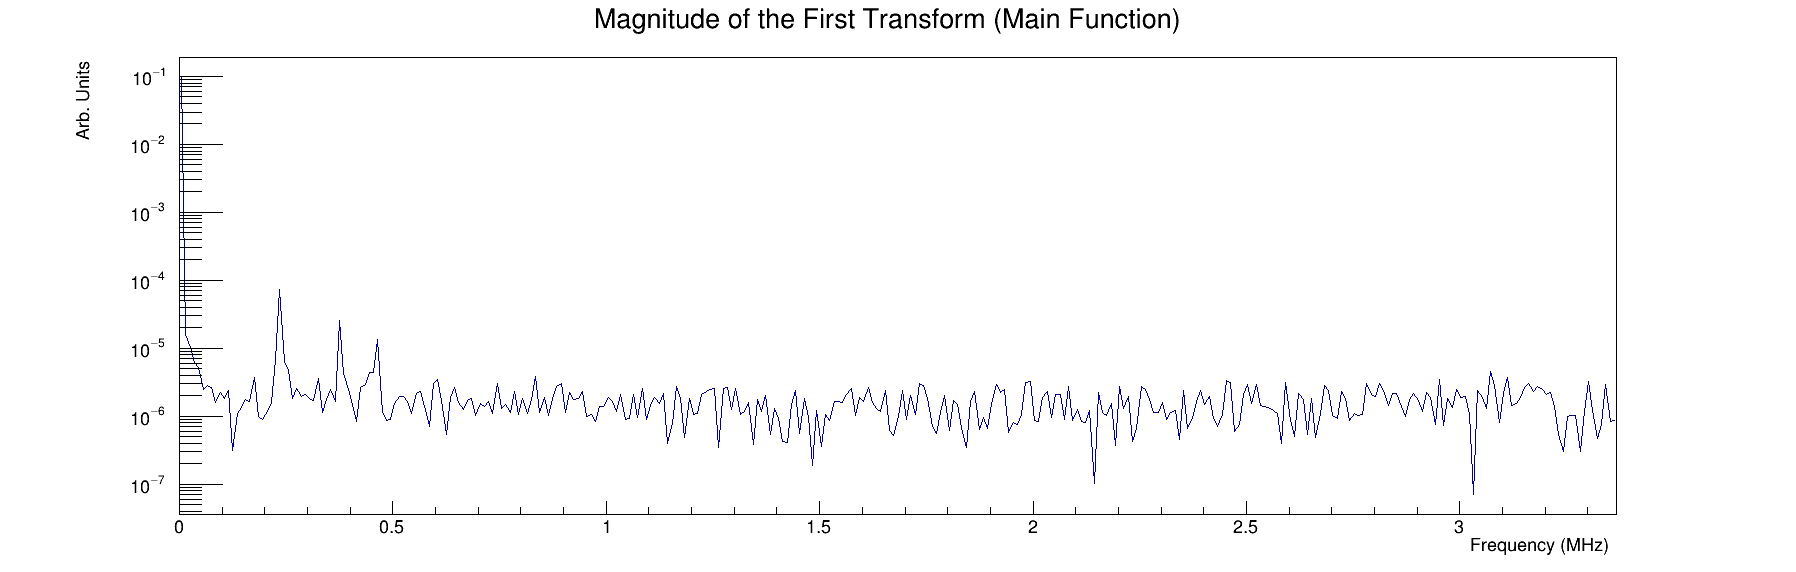

In [8]:
c3 = r.TCanvas("c","c",1800,600)
    
hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = h2.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform (Main Function)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxform.GetEntries()
hxform.Scale(1/normXform)
c2 = r.TCanvas("c","c",1800,600)
c2.cd()
#c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("HIST P0 L")
c2.Draw()

Npart = h2.GetSize() -2
minBinCenter = h2.GetXaxis().GetBinCenter(0)
maxBinCenter = h2.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

import scipy
print( np.fft.fftfreq(Npart, d=deltaT) )

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10.0,6)

limmax = 2*deltaF*Npart #400-25
print(limmax/2,limmaxMHz)
#hxform.GetXaxis().SetLimits(0,limmax)
nbins = h2.GetSize() - 2
hxform.SetBins(Npart,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
#hxform.GetXaxis().SetRangeUser(0,1.4)

residuals5paramXform = hxform.Clone()

c2.SetLogy()
c2.Draw()
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
#c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

In [9]:
def makeFFT(h2, drawImage = None, path = None):
    c3 = r.TCanvas("c","c",1800,600)

    hxform = r.TH1D()
    hxform = 0
    r.TVirtualFFT.SetTransform(0)
    hxform = h2.FFT(hxform,"MAG P")
    hxform.SetTitle("Magnitude of the First Transform (Main Function)")
    #NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
    #    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
    normXform = hxform.GetEntries()
    hxform.Scale(1/normXform)
    c2 = r.TCanvas("c","c",1800,600)
    c2.cd()
    #c2.SetLogy()
    hxform.GetXaxis().SetTitle("Frequency (MHz)")
    hxform.GetYaxis().SetTitle("Arb. Units")
    hxform.Draw("HIST P0 L")
    c2.Draw()

    Npart = h2.GetSize() -2
    minBinCenter = h2.GetXaxis().GetBinCenter(0)
    maxBinCenter = h2.GetXaxis().GetBinCenter(Npart)

    capT = maxBinCenter - minBinCenter
    print(Npart, capT, minBinCenter, maxBinCenter)
    deltaT = capT/Npart #microseconds
    deltaF = 1/capT
    print(deltaT, deltaF)

    deltaTns = deltaT*1000 #nanoseconds
    limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
    limmaxMHz = limmaxHz / math.pow(10.0,6)

    limmax = 2*deltaF*Npart #400-25
    print(limmax,limmaxMHz)
    #hxform.GetXaxis().SetLimits(0,limmax)
    nbins = h2.GetSize() - 2
    hxform.SetBins(Npart,0,limmaxMHz)
    hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
    #hxform.GetXaxis().SetRangeUser(0,1.4)

    #residuals5paramXform = hxform.Clone()

    c2.SetLogy()
    c2.Draw()
    
    if(drawImage):
        c2.Print(str(path)+".png")
        c2.Print(str(path)+".root")
    
    return hxform.Clone(h2.GetTitle()+"_FFT")

---

### Now lets create a 2d histogram of frequencies vs. time in fill

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


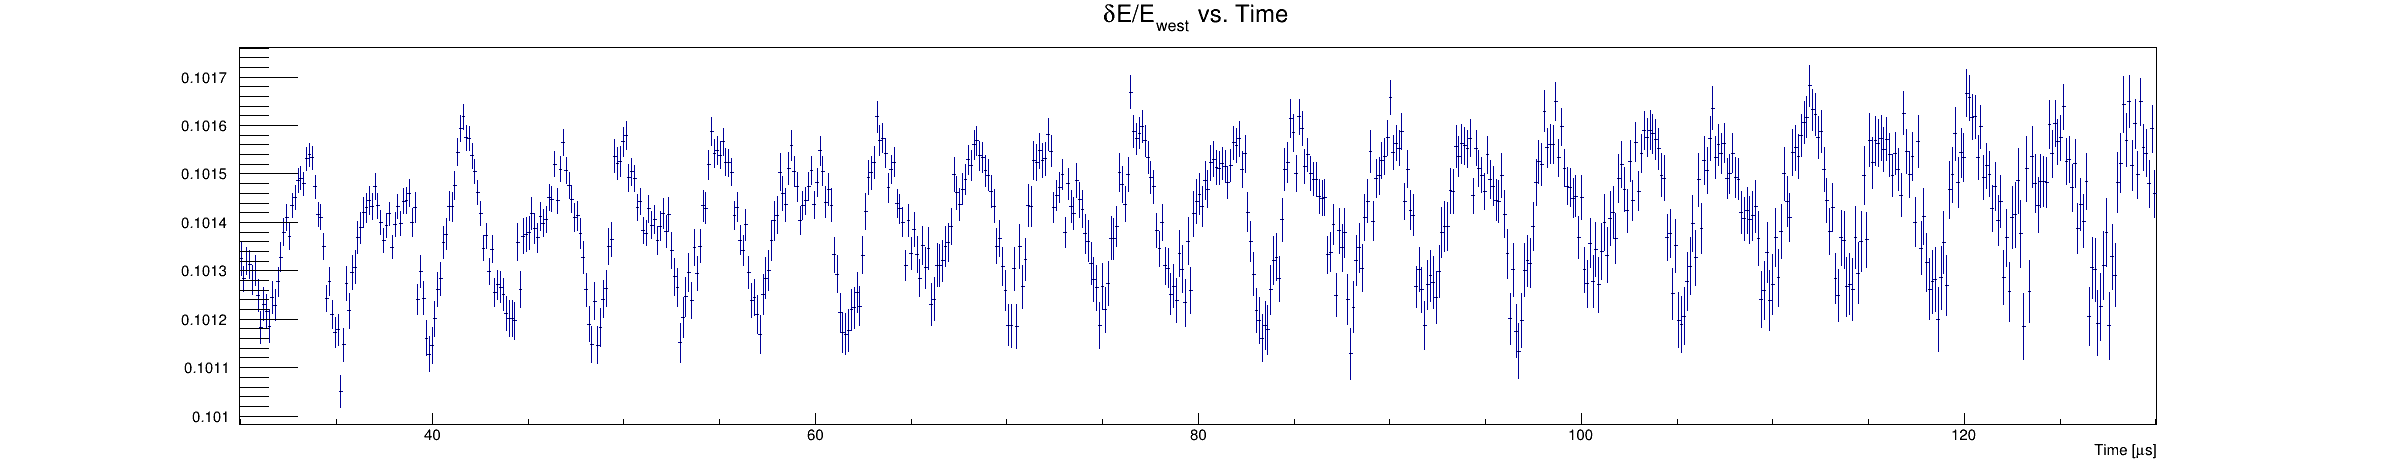

In [10]:
c = r.TCanvas("c","c",2400,500)
h.GetXaxis().SetRangeUser(timeBins[0],timeBins[0]+timeWidth)
h2 = h.ProfileX().Clone("h2")
h2.Draw("")
c.SetLogz()
c.Draw()

In [11]:
print(residuals5paramXform.GetNbinsX(), residuals5paramXform.GetBinWidth(1), residuals5paramXform.GetXaxis().GetXmin(),
    residuals5paramXform.GetXaxis().GetXmax())

672 0.009991496598639456 0.0 6.714285714285715


In [12]:
fft2d = r.TH2D("fft2d","FFT vs. Time; Frequency [MHz]; Time [#mus]", 
              residuals5paramXform.GetNbinsX(), residuals5paramXform.GetXaxis().GetXmin(),residuals5paramXform.GetXaxis().GetXmax(),
               len(timeBins), timeBins[0], timeBins[len(timeBins)-1] + timeWidth)

Starting Range: 30 130
    y bin: 1
672
672 100.08510638297871 29.86170212765957 129.94680851063828
0.14893617021276592 0.009991496598639456
13.428571428571429 6.714285714285715
Starting Range: 130 230
    y bin: 2
673
673 100.23404255319147 129.79787234042553 230.031914893617
0.14893617021276592 0.009976650392697942
13.42857142857143 6.714285714285715
Starting Range: 230 330
    y bin: 3
672
672 100.0851063829787 229.88297872340425 329.96808510638294
0.14893617021276592 0.009991496598639458
13.428571428571432 6.714285714285715
Starting Range: 330 430
    y bin: 4
673
673 100.2340425531915 329.81914893617017 430.05319148936167
0.14893617021276598 0.00997665039269794
13.428571428571427 6.7142857142857135
Starting Range: 430 530
    y bin: 5
672
672 100.08510638297867 429.9042553191489 529.9893617021276
0.14893617021276587 0.009991496598639462
13.428571428571436 6.714285714285718
Starting Range: 530 630
    y bin: 6
672
672 100.08510638297878 529.8404255319148 629.9255319148936
0.1489361

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <T

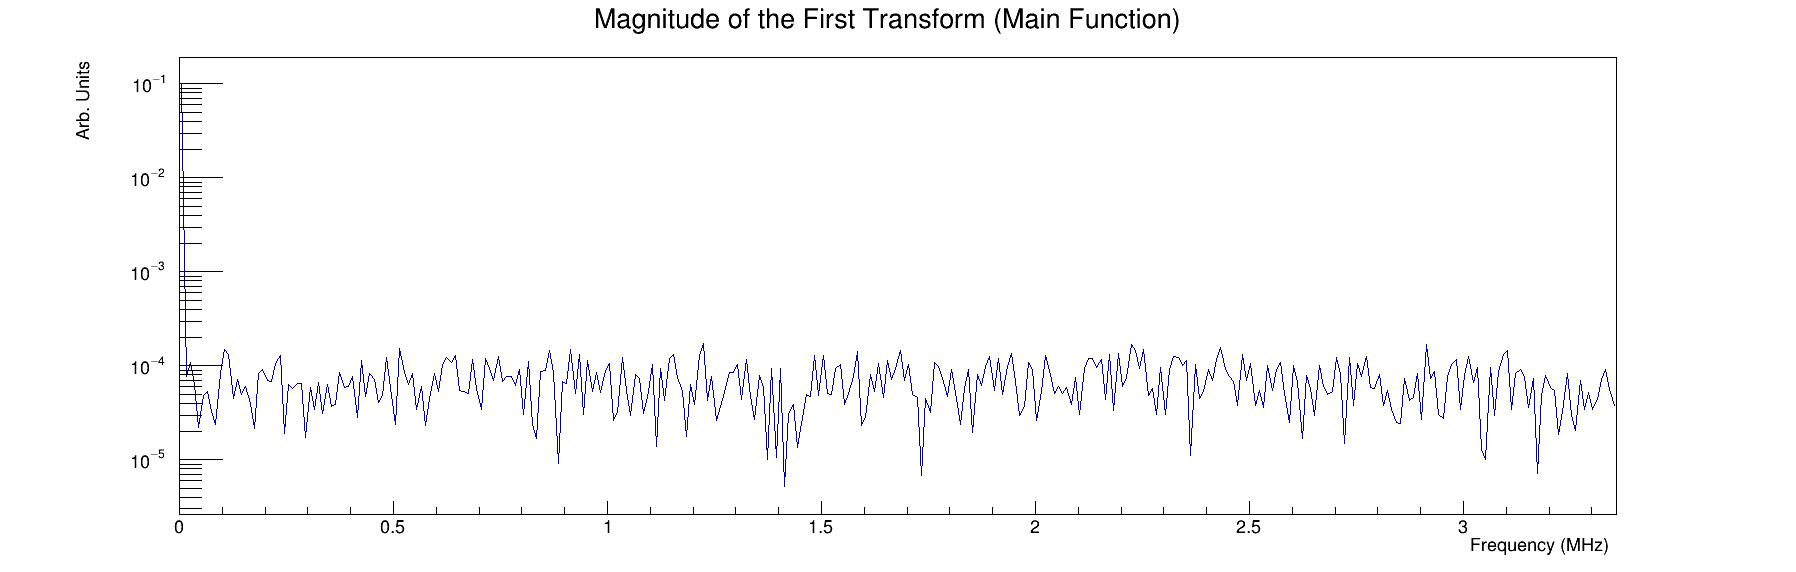

In [13]:
for bin, tlow in enumerate(timeBins):
    fftBin = fft2d.GetYaxis().FindBin(tlow)
    print("Starting Range:", tlow, (tlow + timeWidth))
    print("    y bin:", fftBin)
    h.GetXaxis().SetRangeUser(tlow, tlow+timeWidth)
    h2 = h.ProfileX().Clone("h2")
    print(h2.GetNbinsX())
    h2fft = makeFFT(h2)
    #h2fft.Scale(1/(h2fft.GetEntries()))
    for i in range(h2fft.GetNbinsX()):
        content = h2fft.GetBinContent(i+1)
        fft2d.SetBinContent(i+1, fftBin, content)

Info in <TCanvas::SaveAs>: ROOT file ./images/fft2d.root has been created


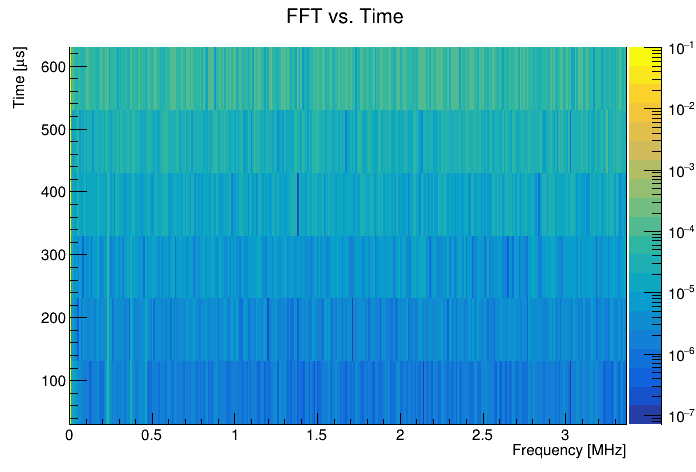

In [14]:
c = r.TCanvas()
fft2d.Draw("colz")
fft2d.GetXaxis().SetRangeUser(0,residuals5paramXform.GetXaxis().GetXmax()/2)
#fft2d.GetZaxis().SetRangeUser(0.00000000001,1)
c.SetLogz()
c.Draw()
c.Print("./images/fft2d.root")

---

### And now by energy

In [15]:
#f2 = r.TFile("./data/resulthists.root")
f2 = r.TFile("./data/Hists_DeltaE_over_EnergyWest_vs_Time_By_EnergyRange_60hUnblinding.root")
f2.ls()

TFile**		./data/Hists_DeltaE_over_EnergyWest_vs_Time_By_EnergyRange_60hUnblinding.root	
 TFile*		./data/Hists_DeltaE_over_EnergyWest_vs_Time_By_EnergyRange_60hUnblinding.root	
  KEY: TH2D	h1;50	#deltaE/E_{west} For 100 < E_{west} < 200
  KEY: TH2D	h2;50	#deltaE/E_{west} For 200 < E_{west} < 300
  KEY: TH2D	h3;50	#deltaE/E_{west} For 300 < E_{west} < 400
  KEY: TH2D	h4;50	#deltaE/E_{west} For 400 < E_{west} < 500
  KEY: TH2D	h5;50	#deltaE/E_{west} For 500 < E_{west} < 600
  KEY: TH2D	h6;50	#deltaE/E_{west} For 600 < E_{west} < 700
  KEY: TH2D	h7;50	#deltaE/E_{west} For 700 < E_{west} < 800
  KEY: TH2D	h8;50	#deltaE/E_{west} For 800 < E_{west} < 900
  KEY: TH2D	h9;50	#deltaE/E_{west} For 900 < E_{west} < 1000
  KEY: TH2D	h10;50	#deltaE/E_{west} For 1000 < E_{west} < 1100
  KEY: TH2D	h11;50	#deltaE/E_{west} For 1100 < E_{west} < 1200
  KEY: TH2D	h12;50	#deltaE/E_{west} For 1200 < E_{west} < 1300
  KEY: TH2D	h13;50	#deltaE/E_{west} For 1300 < E_{west} < 1400
  KEY: TH2D	h14;50	#deltaE/E_{w

In [16]:
h1 = f2.Get("h5").Clone()

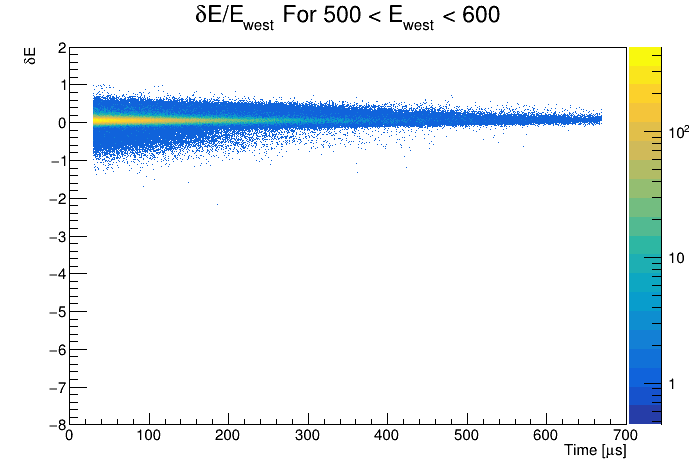

In [17]:
c = r.TCanvas()
h1.Draw("COLZ")
c.SetLogz()
c.Draw()

In [18]:
h1.GetXaxis().SetRangeUser(30,650)
h1x = h1.ProfileX().Clone()

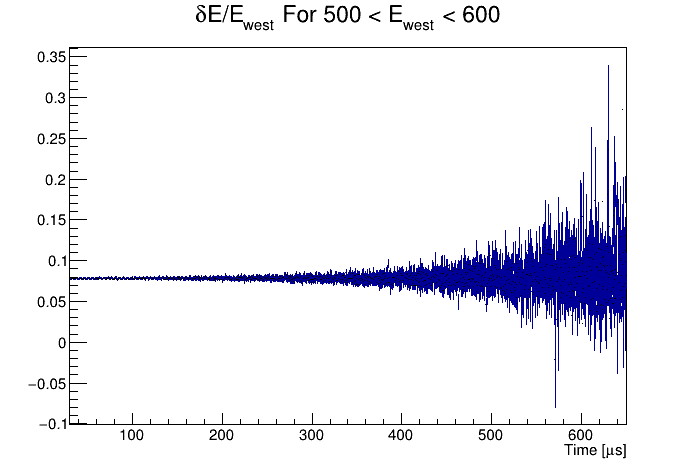

In [19]:
c = r.TCanvas()
h1x.Draw("COLZ")
c.SetLogz()
c.Draw()

4164 620.1702127659573 29.86170212765957 650.0319148936169
0.14893617021276592 0.0016124605461781258
13.42857142857143 6.714285714285715


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


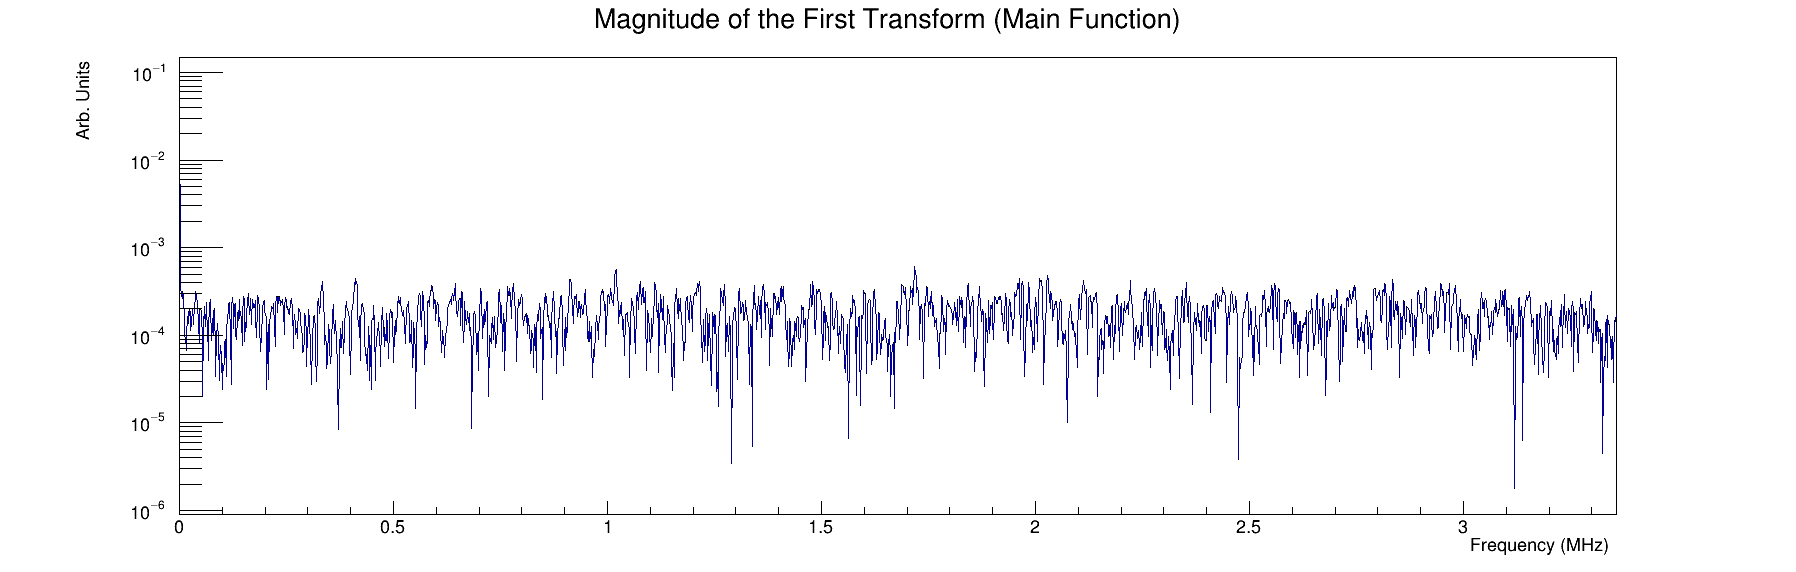

In [20]:
fft1 = makeFFT(h1x)

In [21]:
fft2d = r.TH2D("fft2d","FFT vs. Energy; Frequency [MHz]; Energy [MeV]", 
              fft1.GetNbinsX(), fft1.GetXaxis().GetXmin(),fft1.GetXaxis().GetXmax(),
               34, 100,3500)

Starting Range: 1
    y bin: 1
4164
4164 620.1702127659573 29.86170212765957 650.0319148936169
0.14893617021276592 0.0016124605461781258
13.42857142857143 6.714285714285715
Starting Range: 2
    y bin: 2
4164
4164 620.1702127659573 29.86170212765957 650.0319148936169
0.14893617021276592 0.0016124605461781258
13.42857142857143 6.714285714285715
Starting Range: 3
    y bin: 3
4164
4164 620.1702127659573 29.86170212765957 650.0319148936169
0.14893617021276592 0.0016124605461781258
13.42857142857143 6.714285714285715
Starting Range: 4
    y bin: 4
4164
4164 620.1702127659573 29.86170212765957 650.0319148936169
0.14893617021276592 0.0016124605461781258
13.42857142857143 6.714285714285715
Starting Range: 5
    y bin: 5
4164
4164 620.1702127659573 29.86170212765957 650.0319148936169
0.14893617021276592 0.0016124605461781258
13.42857142857143 6.714285714285715
Starting Range: 6
    y bin: 6
4164
4164 620.1702127659573 29.86170212765957 650.0319148936169
0.14893617021276592 0.001612460546178125

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Rep

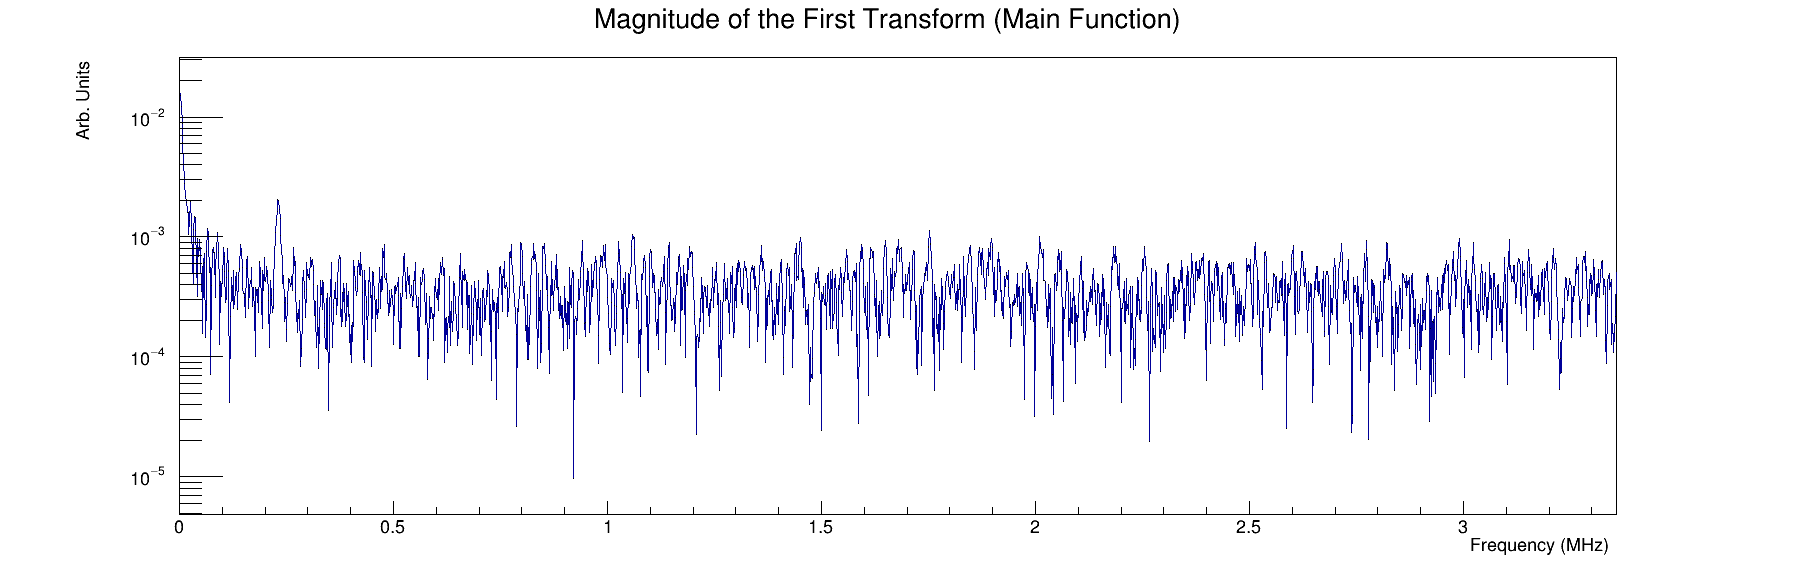

In [22]:
for i in range(1,35):
    fftBin = fft2d.GetYaxis().FindBin(i*100 + 1)
    print("Starting Range:", i)
    print("    y bin:", fftBin)

    h = f2.Get("h"+str(i))
    h.GetXaxis().SetRangeUser(30,650)
    h2 = h.ProfileX()
    print(h2.GetNbinsX())
    h2fft = makeFFT(h2)
    #h2fft.Scale(1/(h2fft.GetEntries()))
    for i in range(h2fft.GetNbinsX()):
        content = h2fft.GetBinContent(i+1)
        fft2d.SetBinContent(i+1, fftBin, content)
    h2fft.Delete()
    h.Delete()
    h2.Delete()

Info in <TCanvas::SaveAs>: ROOT file ./images/fft2d_energy.root has been created


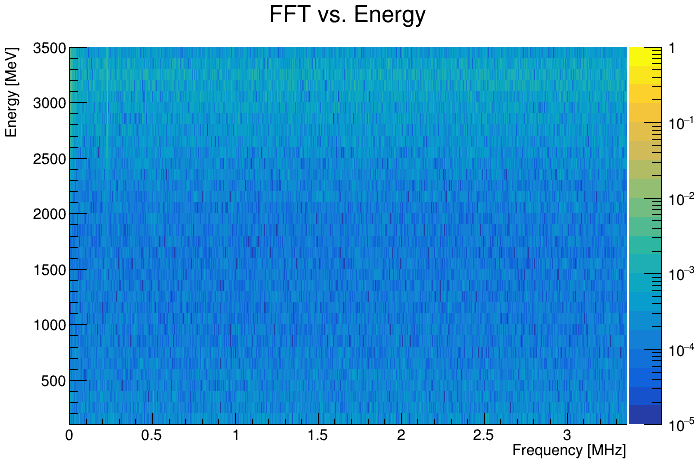

In [23]:
c = r.TCanvas()
fft2d.Draw("colz")
fft2d.GetXaxis().SetRangeUser(0,residuals5paramXform.GetXaxis().GetXmax()/2)
fft2d.GetZaxis().SetRangeUser(0.00001,1)
c.SetLogz()
c.Draw()
c.Print("./images/fft2d_energy.root")

In [24]:
print("hi")

hi
